In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlite3 as sql
import sys,csv
import matplotlib
from tqdm import tqdm
import pickle
import string
from nltk.corpus import stopwords
import scipy
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import learning_curve


from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB

In [5]:
sparse_matrix = scipy.sparse.load_npz("content_tfidf.npz")

In [6]:
df = pd.read_csv("../final_data_for_model.csv")

In [33]:
df[10000:210000].groupby('type').count()

,Unnamed: 0,content
type,,
0,103737,103737
1,96263,96263


In [5]:
np.random.seed(42)
np.random.shuffle(sparse_matrix[0])
index = np.arange(np.shape(sparse_matrix)[0])
print index
np.random.shuffle(index)
return matrix[index, :]

SyntaxError: Missing parentheses in call to 'print'. Did you mean print(index)? (<ipython-input-5-98583cca48df>, line 4)

In [22]:
bayes = MultinomialNB()
bayes.fit(sparse_matrix[400000:600000], df['type'][400000:600000])
pred = bayes.predict(sparse_matrix)
accuracy_score(pred,df['type'])

0.7618644534645777

In [16]:
df[:200000].groupby('type').count()

,Unnamed: 0,content
type,,
0,113737,113737
1,86263,86263


In [15]:
bayes = MultinomialNB()
bayes.fit(sparse_matrix[:200000], df['type'][:200000])
pred = bayes.predict(sparse_matrix)
accuracy_score(pred,df['type'])

0.8798862227095064

In [8]:
i = 80000
x = []
y = []
while i < 740000:
    bayes = MultinomialNB()
    bayes.fit(sparse_matrix[:i], df['type'][:i])
    pred = bayes.predict(sparse_matrix)
    x.append(i)
    y.append(accuracy_score(pred,df['type']))
    i = i + 10000
print(x, y)

KeyboardInterrupt: 

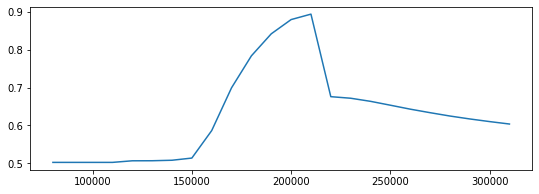

In [7]:
# plotting the points  
plt.figure(figsize=(9, 3))
plt.plot(x, y) 

In [ ]:
i = 80000
x = []
y = []
while i < 740000:
    knn = KNeighborsClassifier()
    knn.fit(sparse_matrix[:i], df['type'][:i])
    pred = knn.predict(sparse_matrix)
    x.append(i)
    y.append(accuracy_score(pred,df['type']))
    i = i + 10000
print(x, y)

In [38]:
for i in range(5):
    knn = KNeighborsClassifier()
    knn.fit(sparse_matrix[:200000], df['type'][:200000])
    pred = knn.predict(sparse_matrix[:200000])
    print(i)

KeyboardInterrupt: 

In [12]:
bayes = MultinomialNB()
bayes.fit(sparse_matrix[:215000], df['type'][:215000])
pred = bayes.predict(sparse_matrix)

In [13]:
print(accuracy_score(pred,df['type']))

0.6752093687563906


In [14]:
rn = MLPClassifier()
rn.fit(sparse_matrix[:10000],df['type'][:10000])
pred = rn.predict(sparse_matrix)

NameError: name 'sparse' is not defined

In [ ]:
print(accuracy_score(pred,df['type']))

In [16]:
learning_curve()

TypeError: learning_curve() missing 3 required positional arguments: 'estimator', 'X', and 'y'

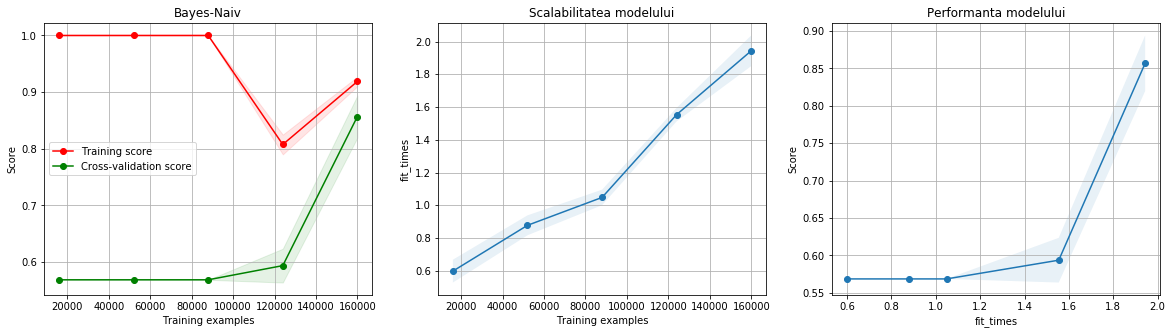

In [36]:
bayes = MultinomialNB()
plt =plot_learning_curve(bayes,"Bayes-Naiv",sparse_matrix[:200000], df['type'][:200000])
plt.show()

E:\LICENTA\Data set\enviroment\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:573: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
E:\LICENTA\Data set\enviroment\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:573: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
E:\LICENTA\Data set\enviroment\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:573: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
E:\LICENTA\Data set\enviroment\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:573: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


KeyboardInterrupt: 

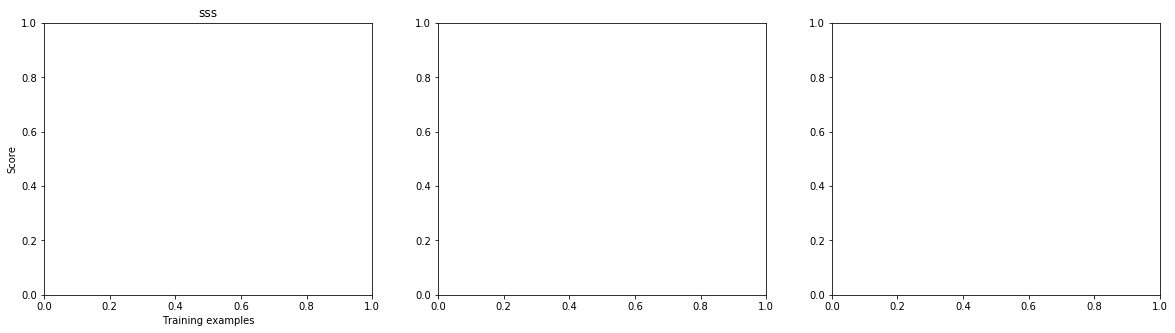

In [25]:
rn = MLPClassifier()
plt =plot_learning_curve(rn,"sss",sparse_matrix[:5], df['type'][:5])
plt.show()

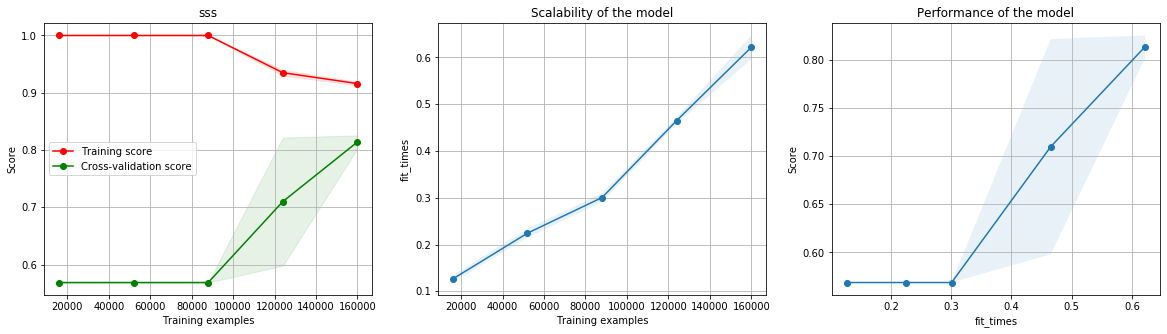

In [24]:
knn = KNeighborsClassifier()
plt =plot_learning_curve(knn,"sss",sparse_matrix[:200000], df['type'][:200000])
plt.show()

In [27]:
def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1,5 )):
    """
    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    axes : array of 3 axes, optional (default=None)
        Axes to use for plotting the curves.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:

          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalabilitatea modelului")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performanta modelului")

    return plt


In [ ]:
bayes = MultinomialNB()
plt =plot_learning_curve(bayes,"sss",sparse_matrix[:], df['type'][:])
plt.show()

rn = MLPClassifier()
plt =plot_learning_curve(rn,"sss",sparse_matrix[:], df['type'][:])
plt.show()

knn = KNeighborsClassifier()
plt =plot_learning_curve(knn,"sss",sparse_matrix[:], df['type'][:])
plt.show()